<a href="https://colab.research.google.com/github/Raph-09/car_predictor_api/blob/master/VEHICLE_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abasiama","key":"84af77b8aed23a2564b66a788052a577"}'}

In [2]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets list

!kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho
!unzip \*.zip  && rm *.zip


ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-05-15 08:36:45           5239  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           2908  
mathurinache/twitter-edge-nodes                             Twitter Edge Nodes                                342MB  2021-03-08 06:43:04            327  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1756  
imsparsh/musicnet-dataset                                   MusicNet Dataset

VEHICLE PRICE PREDICTION(CARDEKHO)

The data is from cardekho website and could be used to demonstrate the use of regression models in solving problems. Am new to datascience ur review will be helpfull. Thanks!


In [88]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from numpy import arange
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingRegressor

LOADING AND EXPLORATION OF DATA

In [404]:
#loading the data
df = pd.read_csv('/content/car data.csv')

In [405]:
#check first 10 rows
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [406]:
#checking bottom 5 rows
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [407]:
df.shape

(301, 9)

In [408]:
#lts get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [409]:
#check for null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

There is no null value in the data

In [410]:
#lets check some statistics
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [411]:
#lets check for categorical and numerical variables
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [412]:
#lets get the categorical variables
cat_vars = [var for var in df.columns if df[var].dtypes=='O']
cat_vars

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [413]:
#lets get the numerical variables
num_vars = [var for var in df.columns if df[var].dtypes!='O']
num_vars

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

In [414]:
#length of numerical and categoical variables
print(len(num_vars))
print(len(cat_vars))

5
4


In [415]:
['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [416]:
#lets  check unique labels in categorical variables
print('unique cars:',df['Car_Name'].unique())
print()
print('unique fuel type:',df['Fuel_Type'].unique())
print()
print('seller type:',df['Seller_Type'].unique())
print()
print('mode of transmission:',df['Transmission'].unique())

unique cars: ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220'

The car_name contain so much labels

In [417]:
#lets count the various car names
df['Car_Name'].value_counts()

city                   26
corolla altis          16
verna                  14
fortuner               11
brio                   10
                       ..
Bajaj Dominar 400       1
Bajaj Pulsar RS200      1
Mahindra Mojo XT300     1
Hyosung GT250R          1
Bajaj Avenger 150       1
Name: Car_Name, Length: 98, dtype: int64

In [418]:
#percentage of each car name sorted in descending order
total_data=len(df)
df_t = pd.Series(df['Car_Name'].value_counts()/total_data)
df_t.sort_values(ascending=False)


city                  0.086379
corolla altis         0.053156
verna                 0.046512
fortuner              0.036545
brio                  0.033223
                        ...   
Hero Glamour          0.003322
Honda Activa 125      0.003322
Hero  Ignitor Disc    0.003322
Hero Hunk             0.003322
Bajaj Avenger 150     0.003322
Name: Car_Name, Length: 98, dtype: float64

In [419]:
#lets create mean car price per car name
def mean_car_price_per_carname(df, vr):

    total_data = len(df)

   
    df_t = pd.Series(df[vr].value_counts() / total_data).reset_index()
    df_t.columns = [vr, 'per_carnames']

   
    df_t = df_t.merge(df.groupby([vr])['Selling_Price'].mean().reset_index(),
                            on=vr,
                            how='left')

    return df_t

In [420]:




df_t = mean_car_price_per_carname(df, 'Car_Name')
df_t.head(20)

,Car_Name,per_carnames,Selling_Price
0,city,0.086379,7.419231
1,corolla altis,0.053156,7.183125
2,verna,0.046512,6.107857
3,fortuner,0.036545,18.685455
4,brio,0.033223,4.745000
5,ciaz,0.029900,7.472222
6,i20,0.029900,4.766667
7,innova,0.029900,12.777778
8,grand i10,0.026578,4.943750
9,Royal Enfield Classic 350,0.023256,1.144286


In [421]:
#let visualize it
def bar_plot(df,var):
    fig, ax = plt.subplots(figsize=(30, 6))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["per_carnames"], color='lightblue')
    ax2.plot(df.index, df["Selling_Price"], color='red')
    ax.axhline(y=0.04, color='red')
    ax.set_ylabel('percentage of car names ')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average car price per name')
    plt.show()

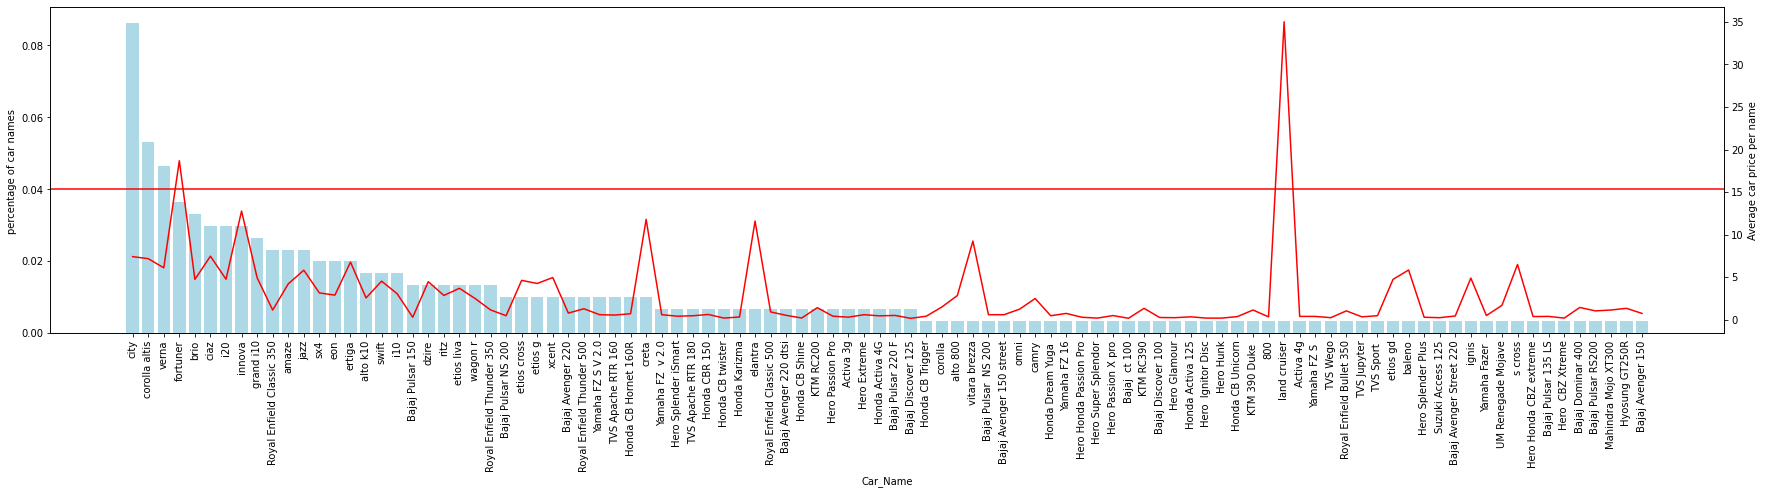

In [422]:
bar_plot(df_t,'Car_Name')

you can see that the car names do have impact on the car selling price

In [423]:
#lets group the car names into rare cars and popular ones
def popular_car_grouping(df,vr):
    total_data = len(df)
    df_t = pd.Series(df[vr].value_counts()/total_data)
    group_car = {
        c:('rare_cars' if c not in df_t[df_t>=0.023256].index  else 'popular_cars')
        for c in df_t.index
    }
    dt = df[vr].map(group_car)
    return dt

In [424]:
df['car_popularity']=popular_car_grouping(df,'Car_Name')


In [425]:
df['car_popularity'].unique()

array(['rare_cars', 'popular_cars'], dtype=object)

In [426]:
#creating number of years from when the car was made
df['car_num_yrs'] = 2021-df['Year']

In [427]:

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_popularity,car_num_yrs
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,rare_cars,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,rare_cars,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,popular_cars,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,rare_cars,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,rare_cars,7


In [428]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,car_num_yrs
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,7.372093
std,2.891554,5.082812,8.644115,38886.883882,0.247915,2.891554
min,2003.000000,0.100000,0.320000,500.000000,0.000000,3.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,5.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,7.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,9.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,18.000000


checking relationship between variables

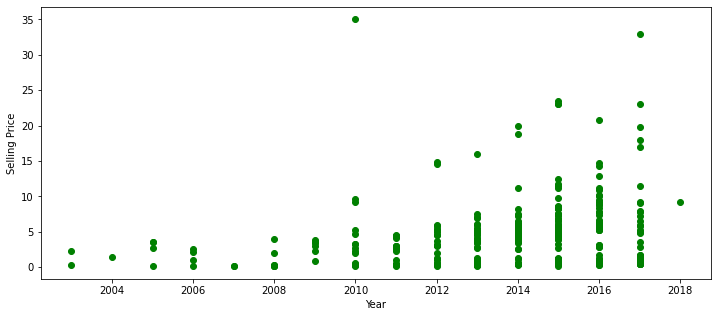

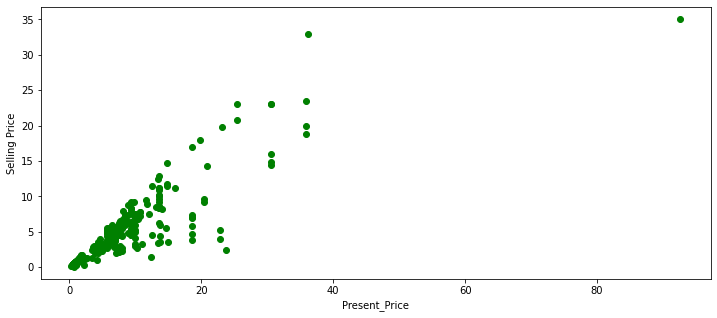

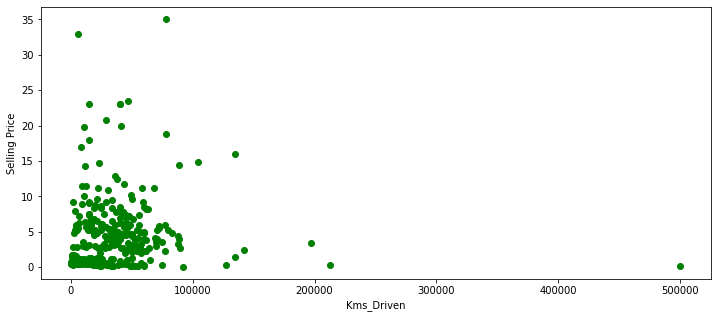

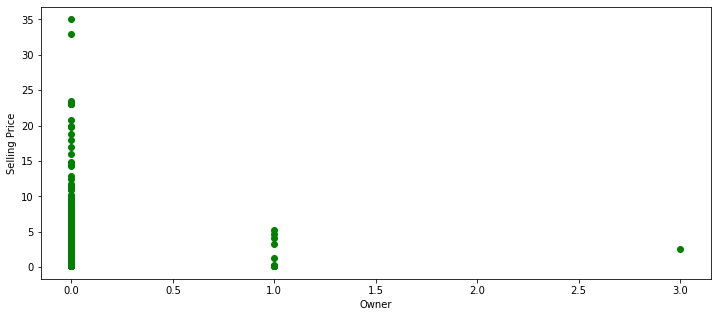

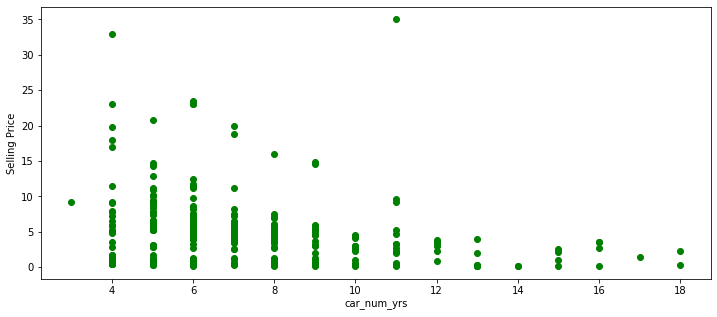

In [429]:
#for numerical variables
num_vars = [var for var in df.columns if df[var].dtypes!='O' and var!='Selling_Price']
for v in num_vars:
    plt.figure(figsize=(12,5))
    plt.plot(df[v],df["Selling_Price"],'o',color='green')
    plt.ylabel('Selling Price')
    plt.xlabel(v)


The selling price tend to have positive correlation with the present price but has negative correlation with car number of years and owner type. It has no correlation with Kms_driven

In [430]:


cat_vars = [var for var in df.columns if df[var].dtypes=='O' and var!="Car_Name"]

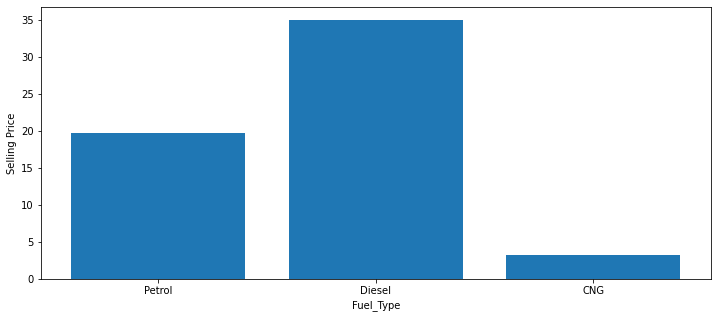

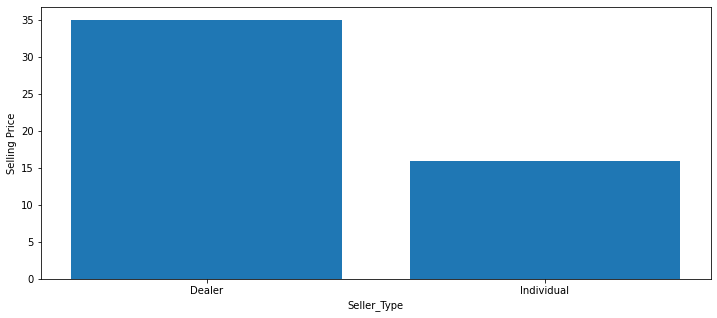

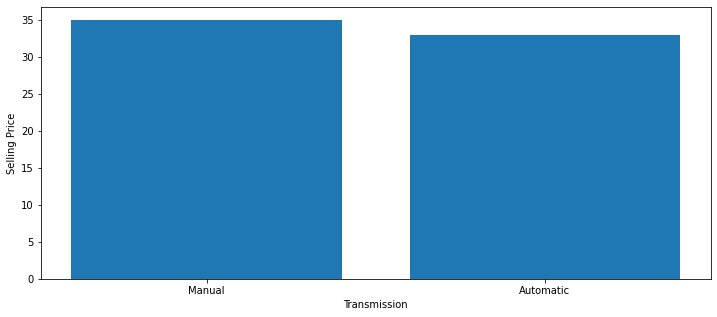

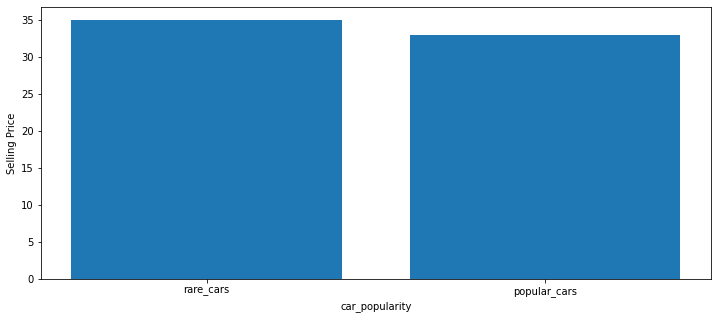

In [431]:
for c in cat_vars:
    plt.figure(figsize=(12,5))
    plt.bar(df[c],df['Selling_Price'])
    plt.xlabel(c)
    plt.ylabel('Selling Price')

In fuel type diesel tends to show highier price followed by petrol and CNG.
For the seller type dealers sell car with highier prices than individual sellers.
Maual transmission cars shows slightly highier average salary than automatic.
RAre cars show slightly highier average price than popular cars.




.
.

Distribution of numerical variables

In [432]:
num_vars

['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'car_num_yrs']

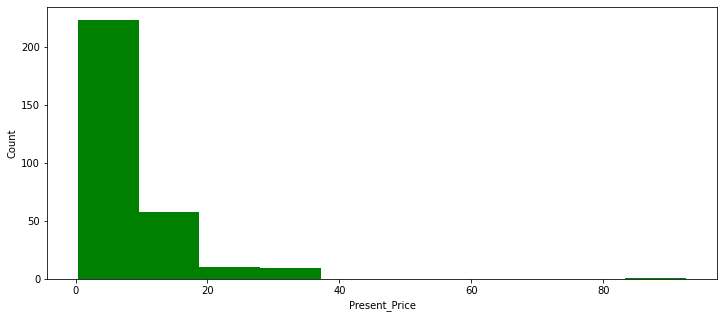

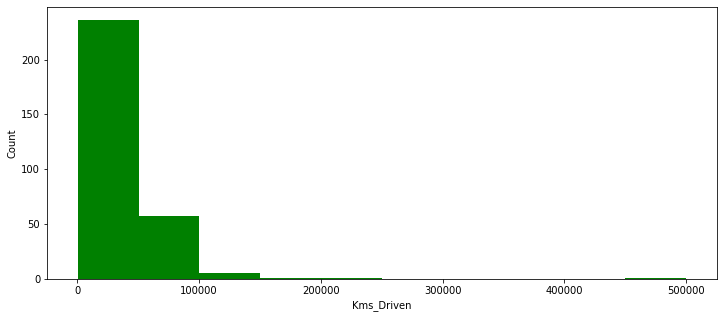

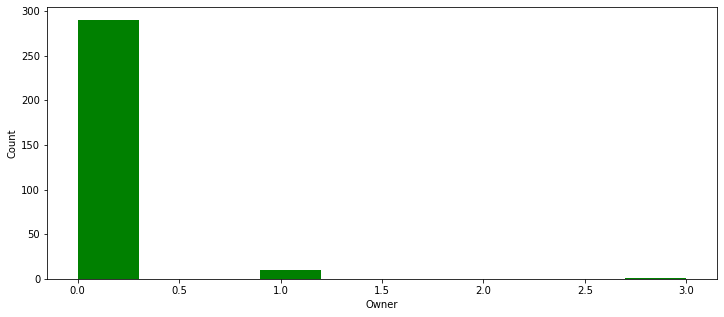

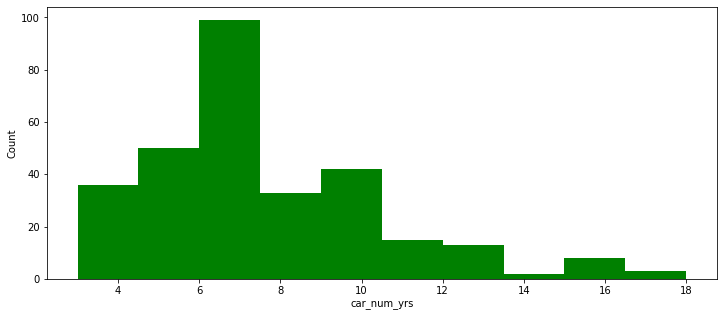

In [433]:
num_vars = [var for var in df.columns if df[var].dtypes!='O' and var!='Selling_Price']
for v in num_vars:
    if v!='Year':
        plt.figure(figsize=(12,5))
        plt.hist(df[v],color='green')
        plt.xlabel(v)
        plt.ylabel('Count')


Present_price,kms_driven and owner is skewed right,while car_num_yrs is slighly normaly distributed(These will require feature transformation)

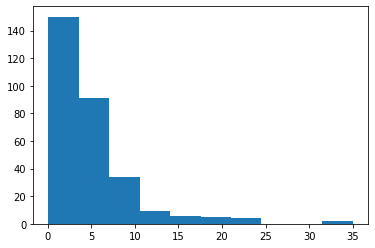

In [434]:
plt.hist(df['Selling_Price'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


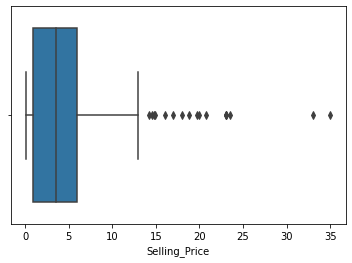

In [435]:
sns.boxplot(df['Selling_Price'])
plt.show()

Presence of outliers(meaning there where some extremely expensive cars)

FEATURE ENGINEERING

Handling Rare Label

In [436]:
#handling rare category that may be present in training but not in testing set(CNG is present only twice in the dataset)
df['Fuel_Type'] = df['Fuel_Type'].replace('CNG','Diesel')

In [437]:
df_t = df[['Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'car_popularity','car_num_yrs','Selling_Price']]

Outlier Handling

since we are dealing with regression problem outlier can impact the performance of our model. From our boxplot and histogram there where loys of outliers in the selling price.

In [438]:
#investigate the quantiles and mean
print('The 95th quantile is:',df_t['Selling_Price'].quantile(0.95))
print('The 5th quantile is:',df_t['Selling_Price'].quantile(0.05))
print('The median is:',df_t['Selling_Price'].quantile(0.50))
print('The 75th quantile is:',df_t['Selling_Price'].quantile(0.75))
print('The mean is:',df_t['Selling_Price'].mean())

The 95th quantile is: 14.5
The 5th quantile is: 0.25
The median is: 3.6
The 75th quantile is: 6.0
The mean is: 4.661295681063127


Meaning the data is centered around 0.25 to 6

In [439]:
#any value above the 95th percentile or below the 2th percentile will be considered  an outlier and replaced by the 95th and 5th respectively

In [440]:
def outlier_boundary(vr):
    oulier_lower=vr.quantile(0.05)
    oulier_upper=vr.quantile(0.95)
    return oulier_lower,oulier_upper

In [441]:
last_p,top_p=outlier_boundary(df_t['Selling_Price'])
last_p,top_p

(0.25, 14.5)

In [442]:
df_t['Selling_Price']=np.where(df_t['Selling_Price']>top_p,top_p,
                    np.where(df_t['Selling_Price']<last_p,last_p,df_t['Selling_Price']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [443]:
last_p,top_p=outlier_boundary(df_t['Present_Price'])
last_p,top_p

(0.54, 22.78)

In [444]:
df_t['Present_Price']=np.where(df_t['Present_Price']>top_p,top_p,
                    np.where(df_t['Present_Price']<last_p,last_p,df_t['Present_Price']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


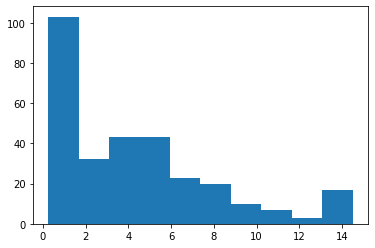

In [445]:
#lets check distribution after winsorisation
plt.hist(df_t['Selling_Price'])
plt.show()

now the outliers are gone

Categorical encoding

using get dummies

In [446]:
df_t = pd.get_dummies(df_t,drop_first=True) 

In [447]:
df_t.head()

,Present_Price,Kms_Driven,Owner,car_num_yrs,Selling_Price,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,car_popularity_rare_cars
0,5.59,27000,0,7,3.35,1,0,1,1
1,9.54,43000,0,8,4.75,0,0,1,1
2,9.85,6900,0,4,7.25,1,0,1,0
3,4.15,5200,0,10,2.85,1,0,1,1
4,6.87,42450,0,7,4.60,0,0,1,1


In [448]:
df_t.describe()

,Present_Price,Kms_Driven,Owner,car_num_yrs,Selling_Price,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,car_popularity_rare_cars
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,7.070532,36947.205980,0.043189,7.372093,4.322591,0.794020,0.352159,0.867110,0.627907
std,6.139529,38886.883882,0.247915,2.891554,3.867603,0.405089,0.478439,0.340021,0.484168
min,0.540000,500.000000,0.000000,3.000000,0.250000,0.000000,0.000000,0.000000,0.000000
25%,1.200000,15000.000000,0.000000,5.000000,0.900000,1.000000,0.000000,1.000000,0.000000
50%,6.400000,32000.000000,0.000000,7.000000,3.600000,1.000000,0.000000,1.000000,1.000000
75%,9.900000,48767.000000,0.000000,9.000000,6.000000,1.000000,1.000000,1.000000,1.000000
max,22.780000,500000.000000,3.000000,18.000000,14.500000,1.000000,1.000000,1.000000,1.000000


FEATURE SELECTION

Selecting Important Features

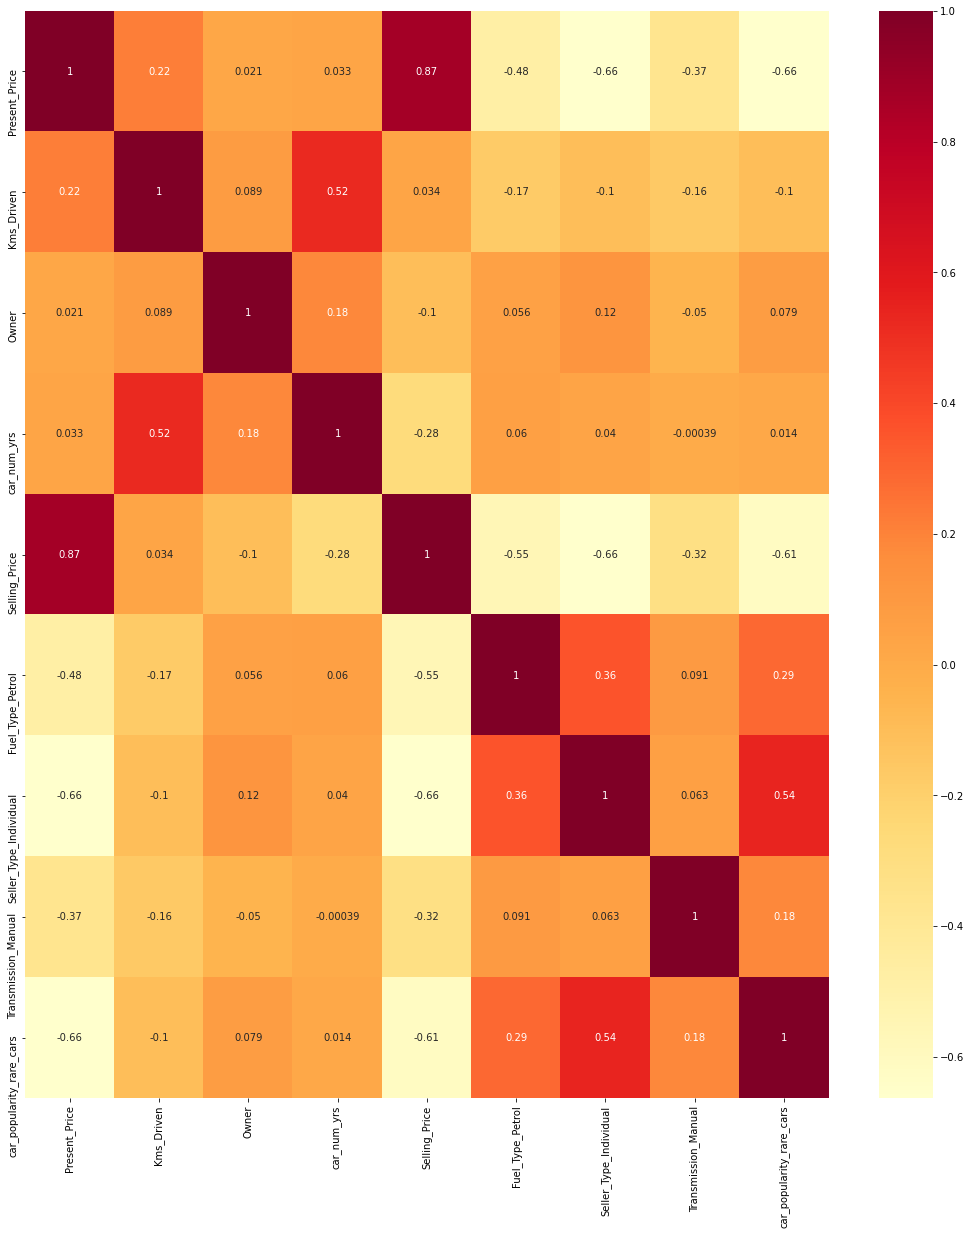

In [449]:
#using correlation matrix
mat_cor = df_t.corr()
high_cor_vr = mat_cor.index
plt.figure(figsize=(18,20))
sns.heatmap(df_t[high_cor_vr].corr(),annot=True,cmap='YlOrRd')

From the correlation matrix it is obvious that Kms_Driven and number of owners show less correlation with the target. So these features will be removed.

In [450]:
df_t.columns

Index(['Present_Price', 'Kms_Driven', 'Owner', 'car_num_yrs', 'Selling_Price',
       'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual',
       'car_popularity_rare_cars'],
      dtype='object')

In [451]:
x = df_t[['Present_Price','car_num_yrs','Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual','car_popularity_rare_cars']]
y = df_t['Selling_Price']

.

Splitting data into train and test sets

In [452]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

.

Feature Scaling

In [453]:
df_t.head()

,Present_Price,Kms_Driven,Owner,car_num_yrs,Selling_Price,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,car_popularity_rare_cars
0,5.59,27000,0,7,3.35,1,0,1,1
1,9.54,43000,0,8,4.75,0,0,1,1
2,9.85,6900,0,4,7.25,1,0,1,0
3,4.15,5200,0,10,2.85,1,0,1,1
4,6.87,42450,0,7,4.60,0,0,1,1


In [454]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [455]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

.

MODEL TRAINING

LASSO REGRESSION

In [456]:
reg = Lasso()
#MOodel evaluation
cv = RepeatedKFold(n_splits=11, n_repeats=4, random_state=20)

In [457]:
#Gridsearch for model tuning
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

In [458]:
find_params = GridSearchCV(reg, grid, cv=cv, n_jobs=1)

In [459]:
#fit it to our data for it the learn the best parameters 
lasso_model = find_params.fit(x_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203.70510931486368, tolerance: 0.3155896735779817
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dis

In [460]:
#mean absolute error and best parameter
print('r2: %.2f' % lasso_model.best_score_)
print('best parameter: %s' % lasso_model.best_params_) 
      

r2: 0.84
best parameter: {'alpha': 0.02}


In [461]:
#making predictions
lasso_pred =lasso_model.predict(x_test_scaled)

In [462]:
print('lasso regression r2 is:',lasso_model.score(x_test_scaled,y_test)) 
print('RMSE',(mean_squared_error(lasso_pred,y_test))**0.5)
print('MAE',mean_absolute_error(lasso_pred,y_test))

lasso regression r2 is: 0.892636150589071
RMSE 1.240557516559482
MAE 0.8193465965229342


.


KNN REGRESSION

In [463]:
#knn instance
knn_set = KNeighborsRegressor()

In [464]:
#hyperparameters
leaf_size = list(range(1,11))
n_neighbors = list(range(1,11))
p=[1,2]

In [465]:
#setting hyperparameters as dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [466]:
#Use GridSearch
knn_grid = GridSearchCV(knn_set, hyperparameters, cv=10)

In [467]:
#Fit the model
knn_reg = knn_grid.fit(x_train_scaled,y_train)
pred_knn=knn_reg.predict(x_test_scaled)

In [468]:
print('knn regression r2 is:',knn_reg.score(x_test_scaled,y_test)) 
print('MSE',mean_squared_error(pred_knn,y_test))
print('RMSE',(mean_squared_error(pred_knn,y_test))**0.5)
print('MAE',mean_absolute_error(pred_knn,y_test))

knn regression r2 is: 0.969063031531672
MSE 0.44345901639344265
RMSE 0.665927185504123
MAE 0.4606557377049181


.

RANDOM FOREST

In [469]:
#create instance of random forest
rf_reg=RandomForestRegressor()

In [470]:
# Number of trees to try 
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200,1300]
#max features to consider 
max_features = ['auto', 'sqrt']
# Maximum number of depth in trees
max_depth = [5, 10, 15, 20, 25, 30,35]
#min samples for splitting nodes
min_samples_split = [5, 10, 15, 20,25,60,100]
# Min samples for each leaf 
min_samples_leaf = [1, 2, 3,5, 12]

In [471]:
#random grid for hyperparameter tuning
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}



In [472]:
random_grid

{'max_depth': [5, 10, 15, 20, 25, 30, 35],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 5, 12],
 'min_samples_split': [5, 10, 15, 20, 25, 60, 100],
 'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200,
  1300]}

In [473]:
#search for optimal parameters using cv=6
rf_regr = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid, n_iter = 12, cv = 6, verbose=0, random_state=4, n_jobs = 1)


In [474]:
rf_regr.fit(x_train_scaled,y_train)

RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [475]:
pred_rf=rf_regr.predict(x_test_scaled) 

In [476]:
print('r2 of random forest regressor:',rf_regr.score(x_test_scaled,y_test))
print('RMSE',(mean_squared_error(pred_rf,y_test))**0.5)
print('MAE',mean_absolute_error(pred_rf,y_test))


r2 of random forest regressor: 0.9562298668404653
RMSE 0.7920941417018338
MAE 0.45522583298424724


.

ENSEMBLE:VOTINGREGRESSOR

In [477]:
vote_reg = VotingRegressor([('lasso', lasso_model), ('knn', knn_reg),('rf',rf_regr)]).fit(x_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203.70510931486368, tolerance: 0.3155896735779817
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dis

In [478]:
pred = vote_reg.predict(x_test_scaled)

In [479]:
print('r2 of voting regressor:',vote_reg.score(x_test_scaled,y_test))
print('RMSE',mean_squared_error(pred,y_test))
print('MAE',mean_absolute_error(pred,y_test))

r2 of voting regressor: 0.9595592311594421
RMSE 0.5796891053041701
MAE 0.4654147573338128


In [480]:
print('r2 of voting regressor:',vote_reg.score(x_test_scaled,y_test))
print('r2 of random forest regressor:',rf_regr.score(x_test_scaled,y_test))
print('knn regression r2 is:',knn_reg.score(x_test_scaled,y_test)) 
print('r2 of lasso_regression:',lasso_model.score(x_test_scaled,y_test))

accuracy of voting regressor: 0.9595592311594421
accuracy of random forest regressor: 0.9562298668404653
knn regression accuracy is: 0.969063031531672
accuracy of lasso_regression: 0.892636150589071


In [78]:
import pickle
# open a file, where you ant to store the data
file = open('regression_model_2.pkl', 'wb')

# dump information to that file
pickle.dump(vote_reg, file)

In [322]:
data = {'Present_Price':  [10],
        'car_num_yrs': [1],
         'Fuel_Type_Petrol': [1],
         'Seller_Type_Individual': [0],
         'Transmission_Manual': [1],
        'car_popularity_rare_cars': [0],
        }

df = pd.DataFrame (data, columns = ['Present_Price','car_num_yrs', 'Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual','car_popularity_rare_cars'])


In [323]:
print(df.head(1))

   Present_Price  car_num_yrs  ...  Transmission_Manual  car_popularity_rare_cars
0             10            1  ...                    1                         0

[1 rows x 6 columns]


In [324]:
x_c = scaler.transform(df)

In [330]:
x_c

array([[ 0.46845195, -2.21973745,  0.51298918, -0.76088591,  0.4404882 ,
        -1.31425748]])

In [327]:
pred=knn_reg.predict(x_c)

In [328]:
pred

array([8.53333333])